<a href="https://colab.research.google.com/github/Vignesh-kanna/ml_with_flask/blob/main/Toyoto_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Read the file into a DataFrame
df = pd.read_csv(file_name)

# Display the DataFrame
print(df.head())

Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv
   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

      KM  HP  Doors  Cylinders  Gears  Weight  
0  46986  90      3          4      5    1165  
1  72937  90      3          4      5    1165  
2  41711  90      3          4      5    1165  
3  48000  90      3          4      5    1165  
4  38500  90      3          4      5    1170  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [ ]:
df.isnull()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(1436, 10)

In [ ]:
df.corr

<bound method DataFrame.corr of         Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3     ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04     KM   HP  Doors  Cylinders  Gears  Weight  
0            23  46986   90      3          4      5    1165  
1            23  72937   90      3          4      5    1165  
2            24  41711   90      3          4      5    1165  
3            26  48000   90      3          4      5    1165  
4            30  38500   90      3          4      5    1170  
...         ...    ...  ...    ...        ...    ...     ...  
1431         69  20544   86      3          4      5    1025  
1432         72  19000   86      3          4      5    1015  
1433         71  17016   86      3          4      5    1015  
1434         70  16916   86      3          4      5    1015  
1435         76      1  110      5          4      5    1114  

[1436 rows x 10 columns]>

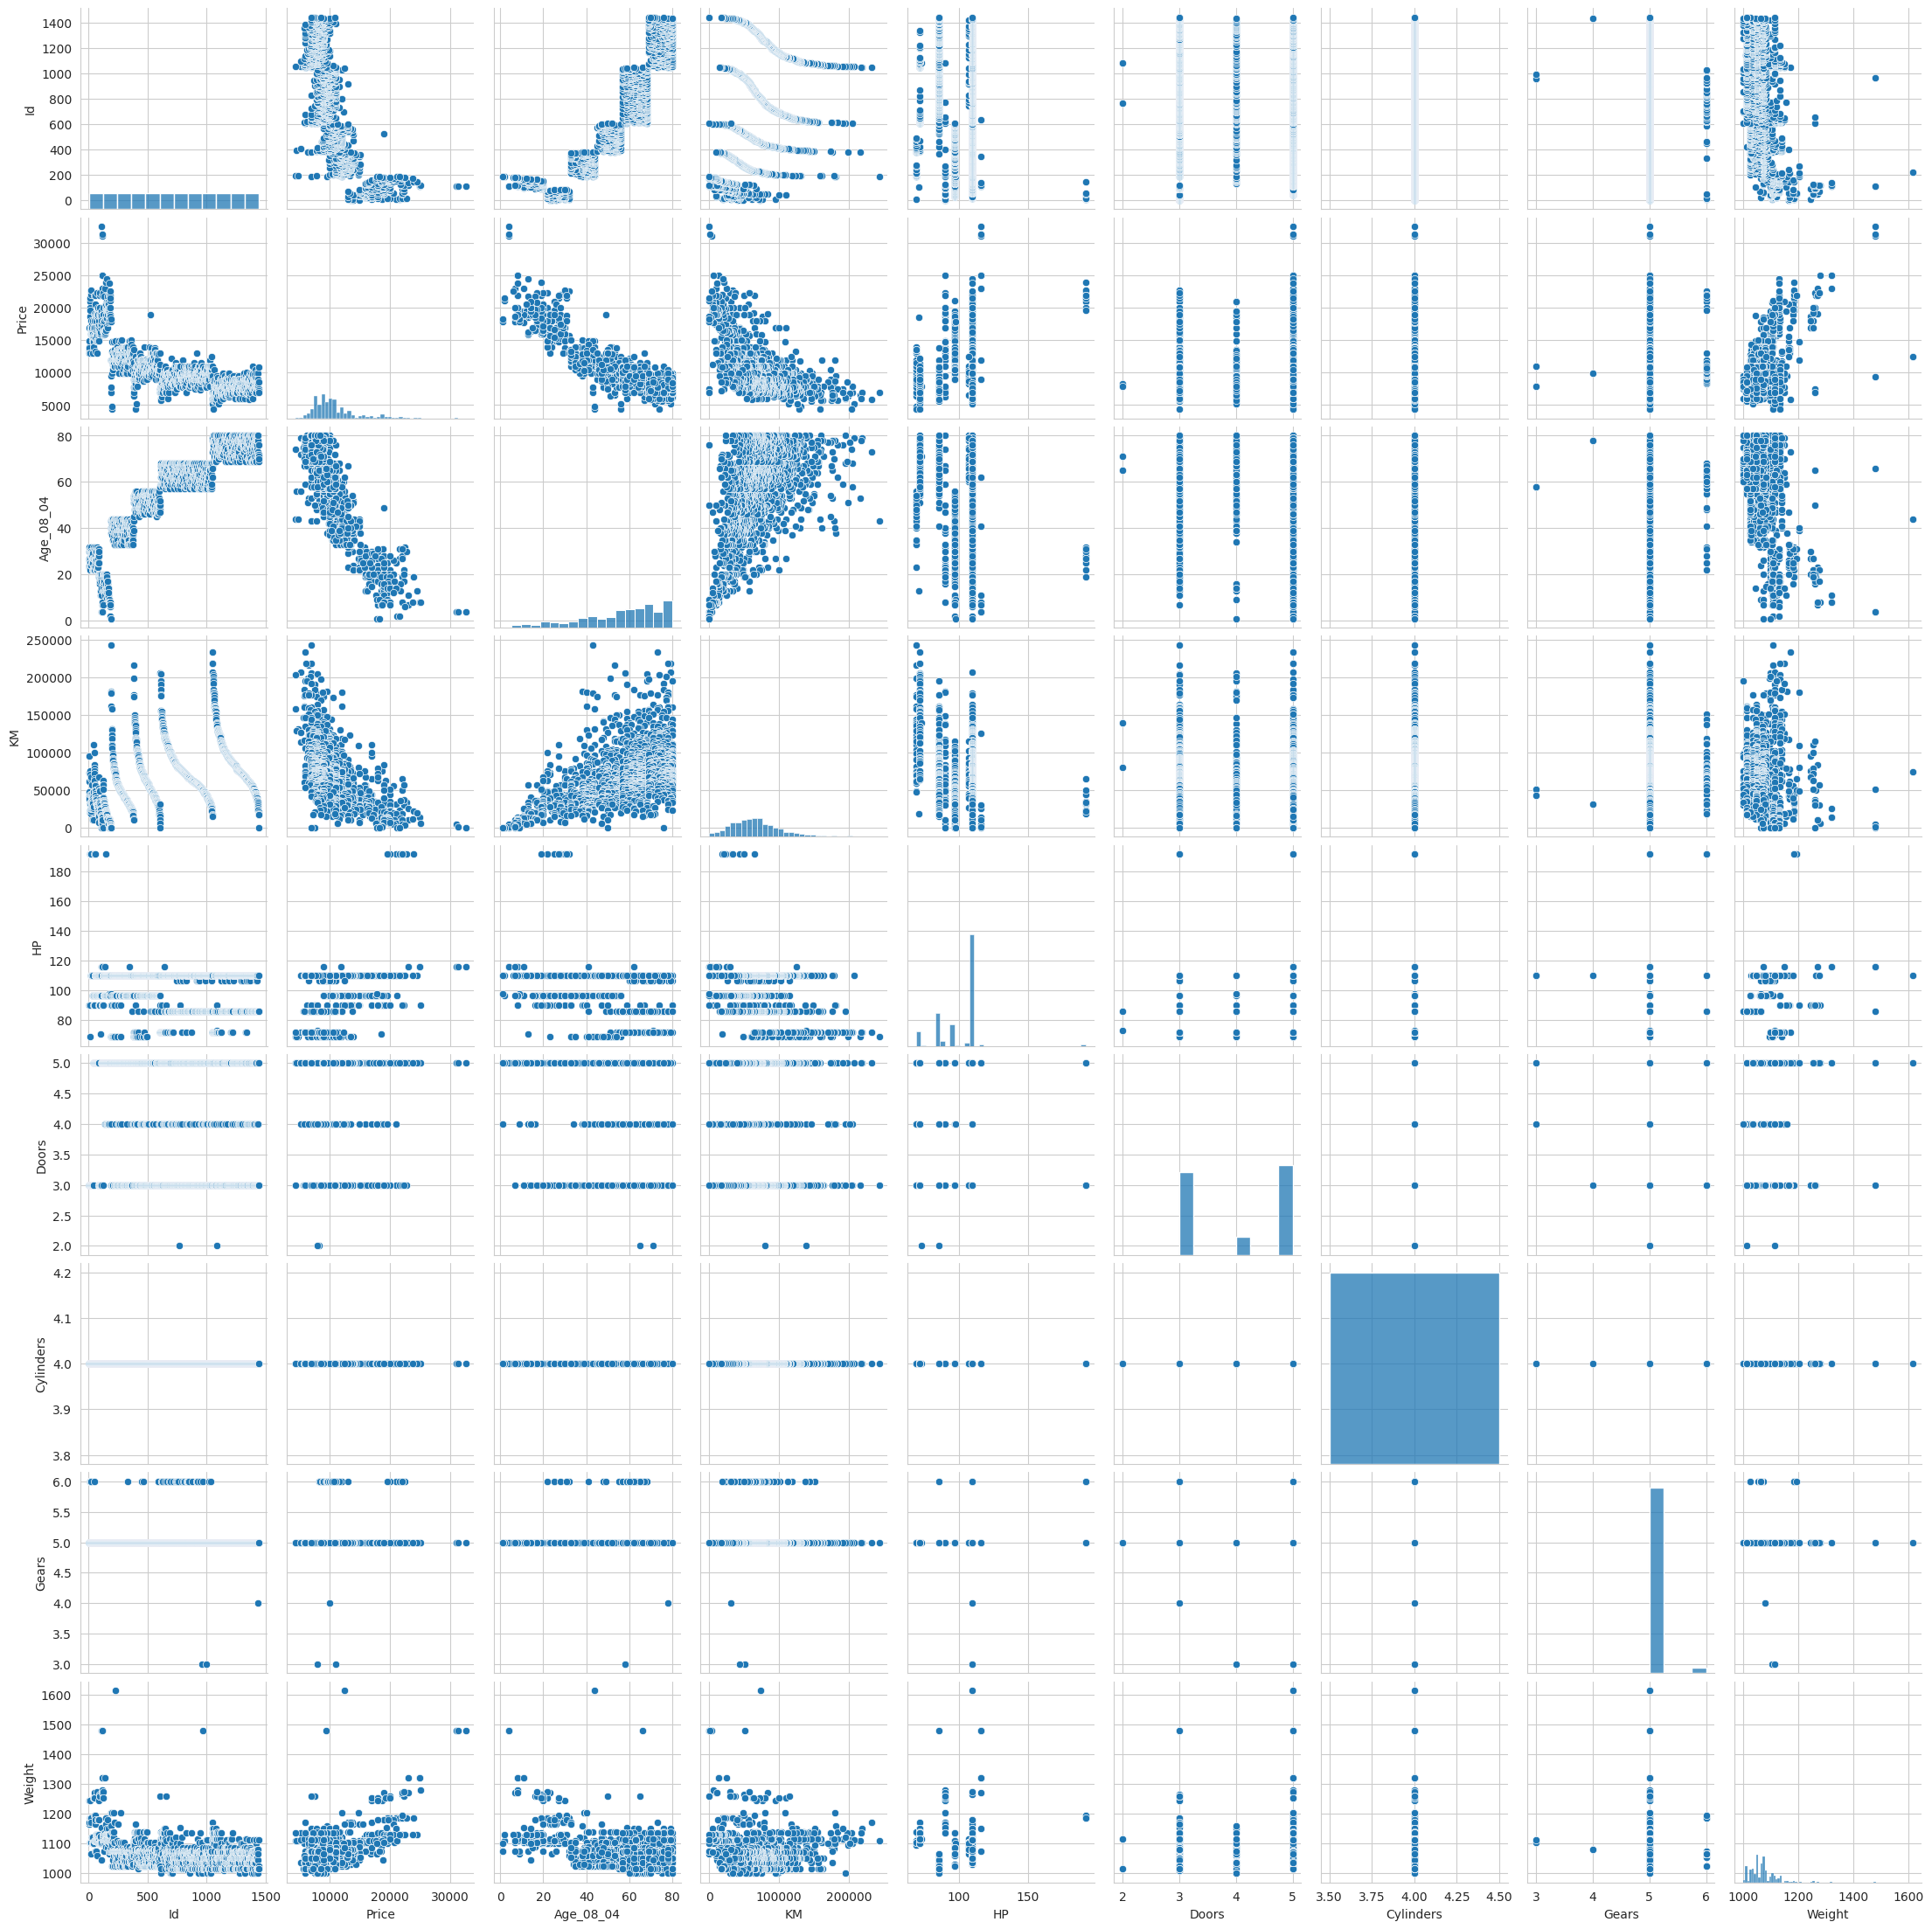

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(df)
plt.show()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>],
       [<Axes: title={'center': 'KM'}>, <Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Doors'}>],
       [<Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

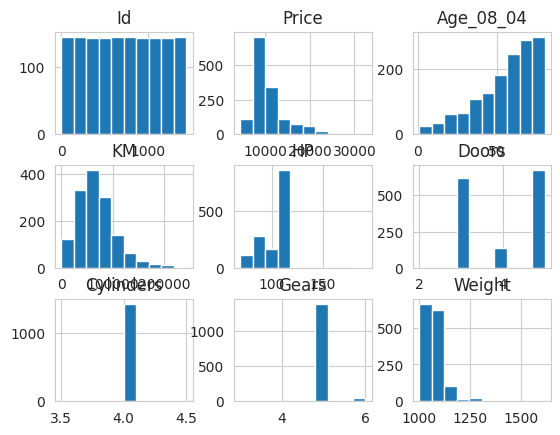

In [ ]:
df.hist()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

print(df.columns)

model = sm.OLS.from_formula('Price ~ Age_08_04 + KM + Doors + HP + Gears + Cylinders + Weight', data=df).fit()


Index(['Id', 'Model', 'Price', 'Age_08_04', 'KM', 'HP', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')


In [ ]:
model.params

,0
Intercept,-410.845504
Age_08_04,-122.242218
KM,-0.019994
Doors,-9.680229
HP,28.350149
Gears,622.282925
Cylinders,-1643.382016
Weight,18.609651


In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -5.323309
Age_08_04   -46.728942
KM          -16.542560
Doors        -0.242055
HP           10.842418
Gears         3.152234
Cylinders    -5.323309
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age_08_04    4.387432e-290
KM            2.238900e-56
Doors         8.087723e-01
HP            2.231791e-26
Gears         1.653931e-03
Cylinders     1.181900e-07
Weight        7.856458e-96
dtype: float64


In [ ]:
(model.rsquared, model.rsquared_adj)

(0.8628024511073658, 0.8622263942190832)